# MeanShift na pratica

## Imports

In [ ]:
import numpy as np
import pandas as pd
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.datasets import make_blobs
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
%matplotlib inline

## Dataset

In [ ]:
X, y = make_blobs(1000, 2, 4)
df= pd.DataFrame(X, columns = ['v1', 'v2'])
df['target'] = y

In [ ]:
FEATURES = [ 'v1', 'v2']

In [ ]:
df.target.value_counts()

3    250
2    250
1    250
0    250
Name: target, dtype: int64

In [ ]:
df[FEATURES].describe()

,v1,v2
count,1000.000000,1000.000000
mean,1.535938,2.955746
std,3.297226,6.143434
min,-4.579258,-7.193981
25%,-1.575862,-3.147197
50%,1.231745,3.208397
75%,4.593541,8.847792
max,8.360994,11.352450


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


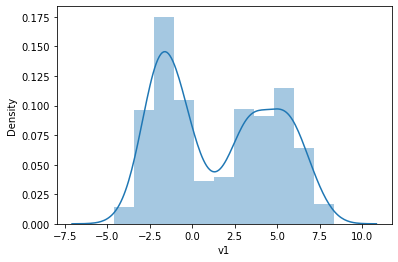

In [ ]:
sns.distplot(df['v1'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


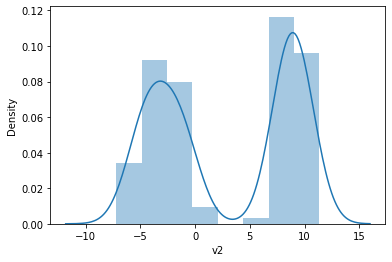

In [ ]:
sns.distplot(df['v2'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


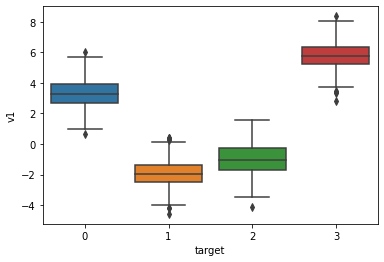

In [ ]:
sns.boxplot('target', 'v1', data = df)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


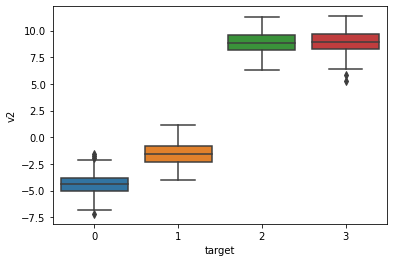

In [ ]:
sns.boxplot('target', 'v2', data = df)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


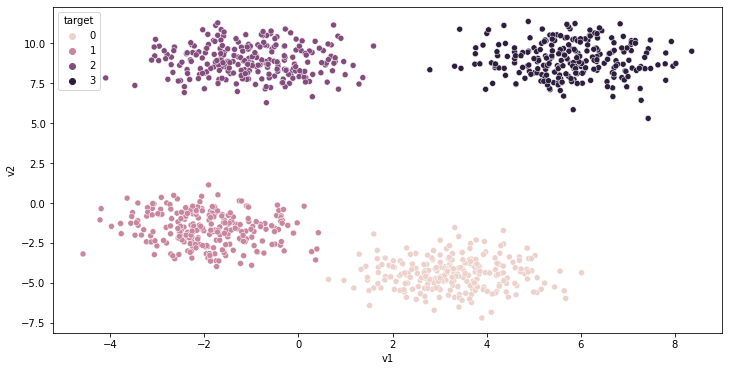

In [ ]:
plt.figure(figsize = (12,6))
sns.scatterplot('v1', 'v2', hue = 'target', data = df)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


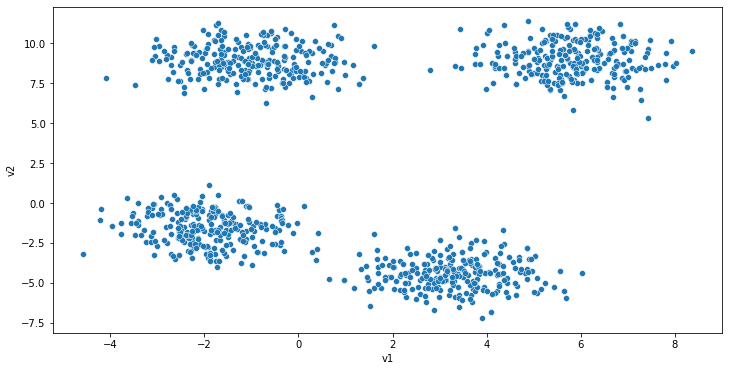

In [ ]:
plt.figure(figsize = (12,6))
sns.scatterplot('v1', 'v2', data = df)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


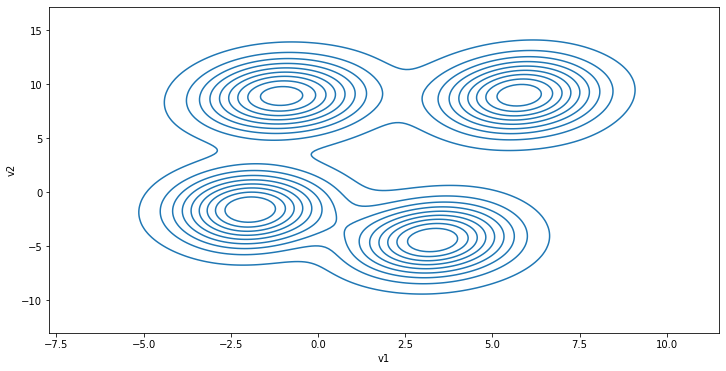

In [ ]:
plt.figure(figsize = (12,6))
sns.kdeplot('v1', 'v2', data = df)
plt.show()

In [ ]:
msc = MeanShift()

In [ ]:
msc.fit(df[FEATURES])

MeanShift(bandwidth=None, bin_seeding=False, cluster_all=True, max_iter=300,
          min_bin_freq=1, n_jobs=None, seeds=None)

In [ ]:
df['cluster'] = msc.predict(df[FEATURES])

In [ ]:
df.groupby('target')['cluster'].value_counts()

target  cluster
0       0          250
1       0          250
2       1          250
3       1          250
Name: cluster, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


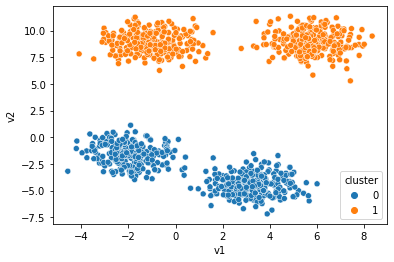

In [ ]:
sns.scatterplot('v1', 'v2', hue = 'cluster', data = df)

In [ ]:
msc.cluster_centers_

array([[ 0.68411257, -3.0126003 ],
       [ 2.3803677 ,  8.94164778]])

In [ ]:
bandwidth = estimate_bandwidth(df[FEATURES], quantile=0.1)

In [ ]:
msc.cluster_centers_

array([[ 0.68411257, -3.0126003 ],
       [ 2.3803677 ,  8.94164778]])

In [ ]:
df

<function matplotlib.pyplot.show>

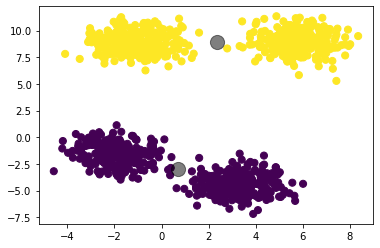

In [ ]:
plt.scatter(df['v1'], df['v2'], c=df['cluster'], s=50, alpha=1);
centers = msc.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);
plt.show

In [ ]:
bandwidth

1.498092953461382

In [ ]:
msc2 = MeanShift(bandwidth=bandwidth ,bin_seeding=True)

In [ ]:
msc2.fit(df[FEATURES])

MeanShift(bandwidth=1.498092953461382, bin_seeding=True, cluster_all=True,
          max_iter=300, min_bin_freq=1, n_jobs=None, seeds=None)

In [ ]:
msc2.cluster_centers_

array([[ 3.18184259, -4.48168701],
       [-1.97238924, -1.51593945],
       [-1.13628323,  8.82515475],
       [ 5.7381267 ,  8.88176958]])

In [ ]:
df['cluster2'] = msc2.predict(df[FEATURES])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


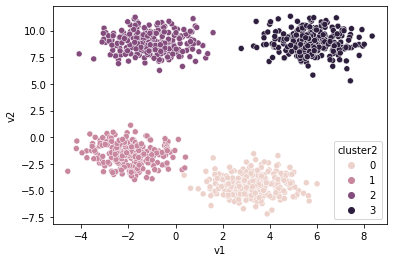

In [ ]:
sns.scatterplot('v1', 'v2', hue = 'cluster2', data = df)

<function matplotlib.pyplot.show>

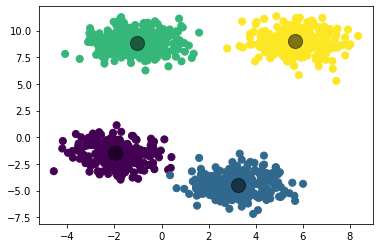

In [ ]:
plt.scatter(df['v1'], df['v2'], c=df['cluster2'], s=50, alpha=1);
centers = msc2.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);
plt.show

In [ ]:
bandwidth2 = estimate_bandwidth(df[FEATURES], quantile=0.03)

In [ ]:
bandwidth2

0.8054742342746883

In [ ]:
msc3 = MeanShift(bandwidth=bandwidth2 ,bin_seeding=True)

In [ ]:
df['cluster3'] = msc3.fit_predict(df[FEATURES])

In [ ]:
msc3.cluster_centers_

array([[ 3.26616335, -4.33820437],
       [-2.00482261, -1.72431756],
       [-1.19470847,  8.71502295],
       [ 5.73567845,  8.80071123],
       [-2.00913017, -0.86749011],
       [ 5.72552   ,  9.88286964],
       [-2.46314788,  9.32646382],
       [ 3.96074436, 10.85206004],
       [ 7.36043356,  5.85642675],
       [-0.19272483,  6.45726328],
       [-3.7873042 ,  7.58465735],
       [ 5.84097452,  5.83110458],
       [ 1.60190574, -1.9380837 ],
       [ 1.59672277,  9.81535719],
       [ 1.51175652, -6.4156775 ],
       [-4.57925806, -3.1884248 ]])

<function matplotlib.pyplot.show>

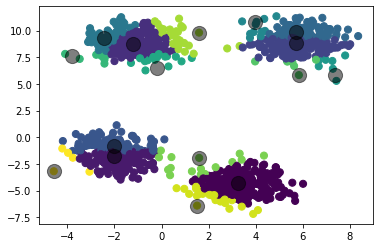

In [ ]:
plt.scatter(df['v1'], df['v2'], c=df['cluster3'], s=50, alpha=1);
centers = msc3.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);
plt.show